# Project 12: Explanatory Data Analysis Challenge (Olympic Games)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 12 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [41]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [42]:
summer.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [43]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [44]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
Year          5770 non-null int64
City          5770 non-null object
Sport         5770 non-null object
Discipline    5770 non-null object
Athlete       5770 non-null object
Country       5770 non-null object
Gender        5770 non-null object
Event         5770 non-null object
Medal         5770 non-null object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [45]:
winter.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [46]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [54]:
olympics = pd.concat([summer,winter], keys = ['Summer', 'Winter'], names = ['Edition']).reset_index().drop(columns = 'level_1')

In [55]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [56]:
olympics = olympics.merge(dic[['Country', 'Code']], left_on = 'Country', right_on  = 'Code')

In [57]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN
1,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,HUN
2,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,HUN
3,Summer,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,HUN
4,Summer,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,HUN
...,...,...,...,...,...,...,...,...,...,...,...,...
30563,Winter,1980,Lake Placid,Skiing,Alpine Skiing,"WENZEL, Hanni",LIE,Women,Giant Slalom,Gold,Liechtenstein,LIE
30564,Winter,1980,Lake Placid,Skiing,Alpine Skiing,"WENZEL, Hanni",LIE,Women,Slalom,Gold,Liechtenstein,LIE
30565,Winter,1984,Sarajevo,Skiing,Alpine Skiing,"WENZEL, Andreas",LIE,Men,Giant Slalom,Bronze,Liechtenstein,LIE
30566,Winter,1984,Sarajevo,Skiing,Alpine Skiing,"KONZETT, Ursula",LIE,Women,Slalom,Bronze,Liechtenstein,LIE


In [58]:
olympics.rename(columns = {'Country_y': 'Country'}, inplace = True)

In [59]:
olympics.drop(columns = 'Country_x', inplace = True)

## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [64]:
dic.rename(columns = {'GDP per Capita': 'GDP'}, inplace = True)

In [71]:
olympics.loc[olympics.Country.isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Country,Code


## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [75]:
olympics.Code.isna().sum()

0

In [83]:
olympics.Medal = pd.Categorical(olympics.Medal, categories = ['Bronze', 'Silver', 'Gold'], ordered = True)

0          Gold
1          Gold
2        Bronze
3        Silver
4        Bronze
          ...  
30563      Gold
30564      Gold
30565    Bronze
30566    Bronze
30567    Bronze
Name: Medal, Length: 30568, dtype: category
Categories (3, object): [Bronze < Silver < Gold]

## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

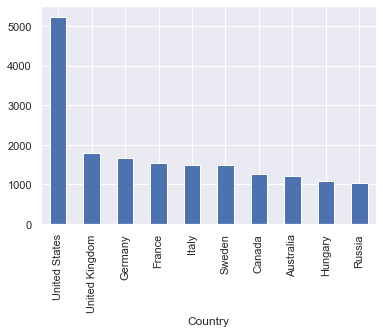

In [100]:
top_10 = olympics.groupby('Country').count().Medal.nlargest(10)
sns.set()
top_10.plot(kind = 'bar')

In [103]:
top_10_winter =olympics.groupby(['Country', 'Edition']).count().Medal.unstack().nlargest(10, 'Winter')

In [104]:
top_10_summer = olympics.groupby(['Country', 'Edition']).count().Medal.unstack().nlargest(10, 'Summer')

In [109]:
top_10_all =  olympics[olympics.Country.isin(top_10.index)]

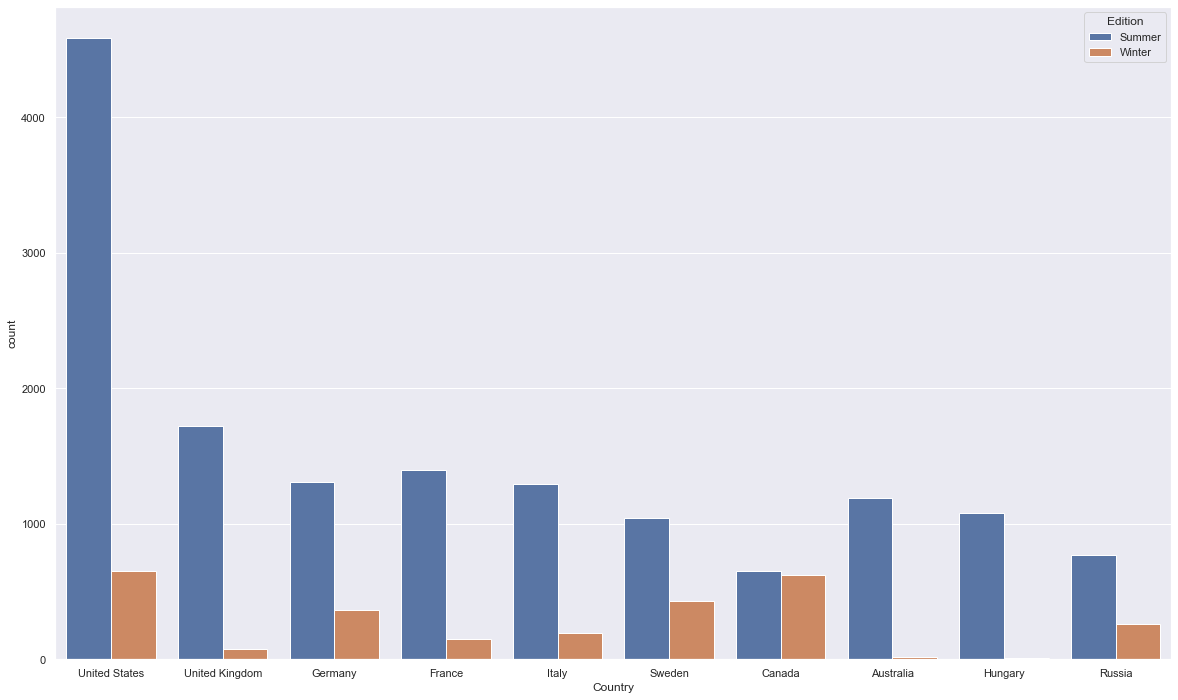

In [114]:
plt.figure(figsize = (20,12))
sns.countplot(data = top_10_all, x = 'Country', hue = 'Edition', order = top_10.index)
plt.show()

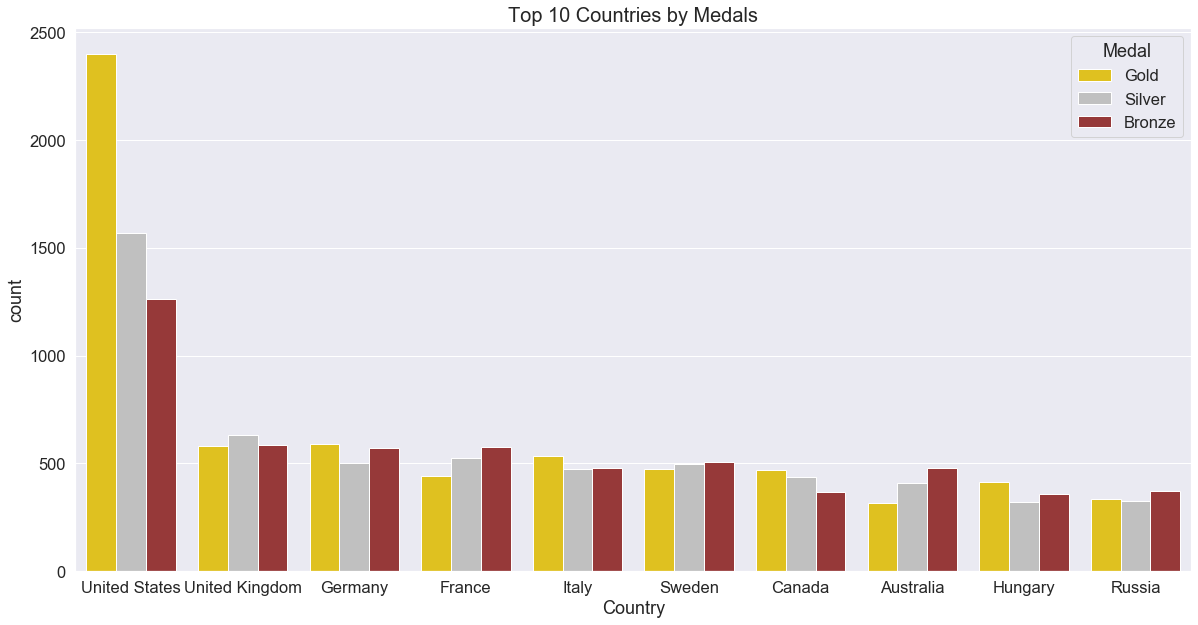

In [115]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = top_10_all, x = "Country", hue = "Medal", order = top_10.index,
              hue_order = ["Gold", "Silver", "Bronze"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

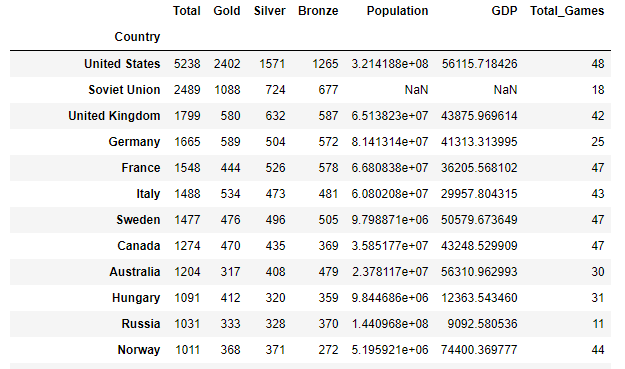

2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

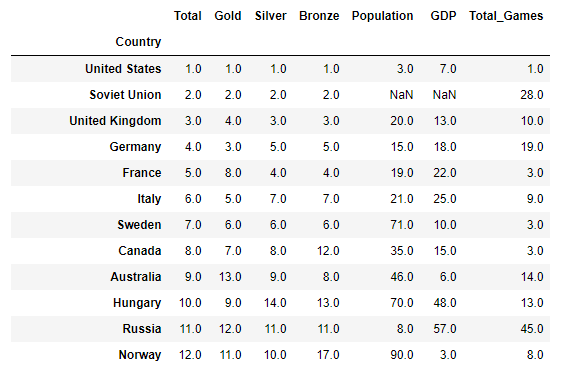

In [141]:
df = pd.crosstab(olympics.Country, olympics.Medal, margins = True, margins_name = 'Total')

In [146]:
df.drop(index = 'Total', inplace = True)

In [151]:
df = df[['Total', 'Gold', 'Silver', 'Bronze']].sort_values(by = ['Total', 'Gold', 'Silver', 'Bronze'], ascending = False)

In [160]:
df['Total_games'] = olympics.groupby(['Country']).count()['Medal']

In [171]:
df1 = df.merge(dic, how = 'left', left_index = True, right_on = 'Country').drop(columns = 'Code').set_index('Country')

In [179]:
olympics['Games'] = olympics.apply(lambda x: str(x.Year) + " " + str(x.City), axis = 1)

In [186]:
olympics.groupby(['Country']).apply(lambda x: x.Games.nunique())

Country
Afghanistan         2
Algeria             6
Argentina          18
Armenia             4
Australia          30
                   ..
Venezuela           9
Vietnam             2
Virgin Islands*     1
Zambia              2
Zimbabwe            3
Length: 130, dtype: int64

In [189]:
df1['Total_games'] = olympics.groupby(['Country']).Games.nunique()

In [197]:
df_rank = df1.rank(axis = 0, ascending = False)

## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

In [198]:
import scipy.stats as stats

In [203]:
stats.spearmanr(df_rank.Total, df_rank.Total_games, nan_policy = 'omit')

SpearmanrResult(correlation=0.9588617040099477, pvalue=7.335729692846408e-72)

In [204]:
stats.spearmanr(df_rank.Total, df_rank.GDP, nan_policy = 'omit')

SpearmanrResult(correlation=0.45444451276582293, pvalue=2.3508783326562971e-07)

In [205]:
stats.spearmanr(df_rank.Total, df_rank.Population, nan_policy = 'omit')

SpearmanrResult(correlation=0.42622296816619926, pvalue=5.846464029639378e-07)

## Aggregating and Ranking

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

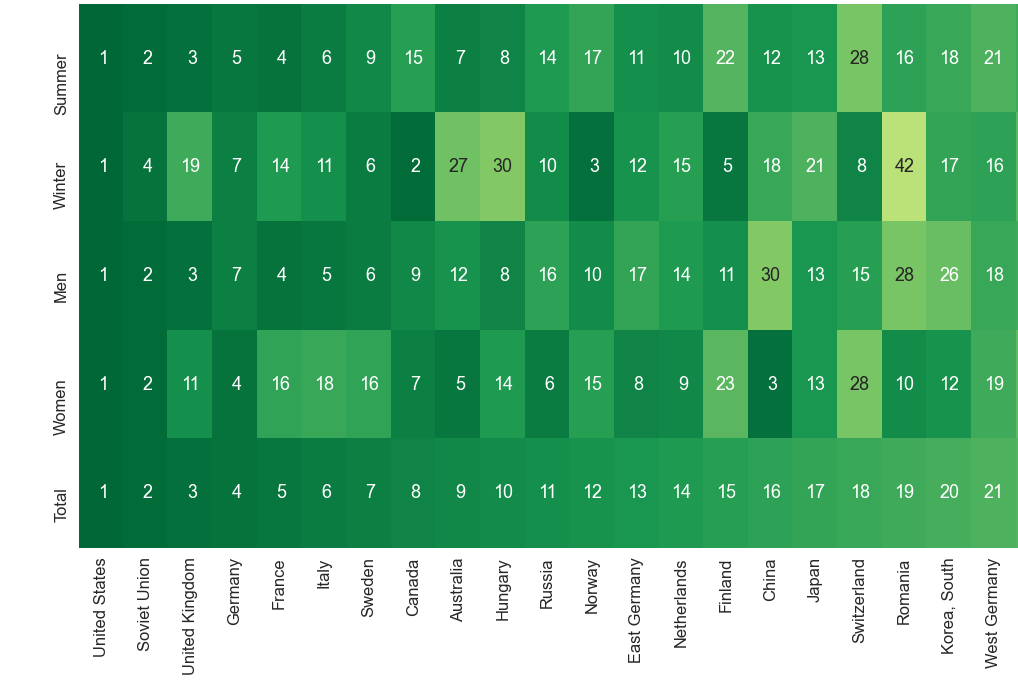

In [217]:
edition = pd.crosstab(olympics.Country,olympics.Edition)

In [231]:
edition

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australia,1189,15
...,...,...
Venezuela,12,0
Vietnam,2,0
Virgin Islands*,1,0


In [218]:
gender = pd.crosstab(olympics.Country, olympics.Gender)

In [230]:
gender

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australia,704,500
...,...,...
Venezuela,10,2
Vietnam,1,1
Virgin Islands*,1,0


In [232]:
total = df['Total'].to_frame()

In [233]:
total

,Total
Country,
United States,5238
United Kingdom,1799
Germany,1665
France,1548
Italy,1488
...,...
Iraq,1
Macedonia,1
Mauritius,1


In [239]:
df2 = total.merge(gender, how = 'inner', left_index=True, right_index = True)

In [241]:
df2 = df2.merge(edition, how = 'inner', left_index=True, right_index = True)

In [244]:
df2_rank = df2.rank(ascending = False)

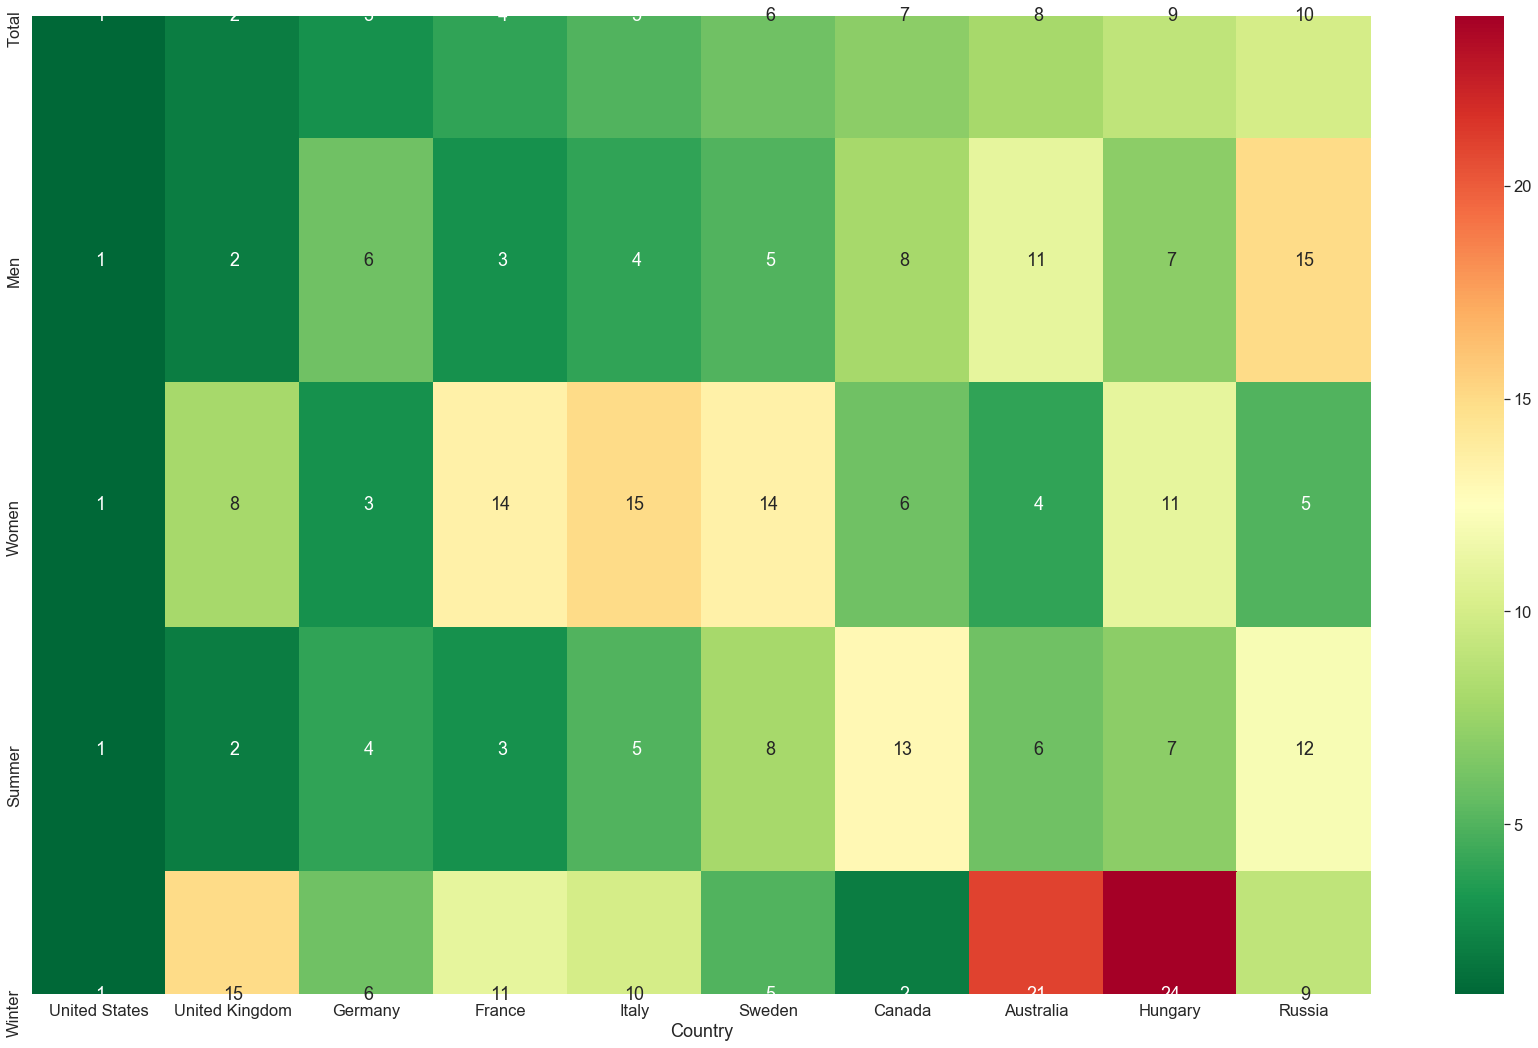

In [252]:
plt.figure(figsize = (30,18))
sns.heatmap(df2_rank[0:10].T, cmap = 'RdYlGn_r', annot = True, fmt = '2.0f')

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

In [258]:
top_50 = df2[0:50]

In [259]:
top_50

,Total,Men,Women,Summer,Winter
Country,,,,,
United States,5238,3618,1620,4585,653
United Kingdom,1799,1470,329,1720,79
Germany,1665,1119,546,1305,360
France,1548,1351,197,1396,152
Italy,1488,1292,196,1296,192
Sweden,1477,1280,197,1044,433
Canada,1274,814,460,649,625
Australia,1204,704,500,1189,15
Hungary,1091,840,251,1079,12


In [261]:
top_50['difference'] = top_50.Summer.sub(top_50.Winter)

C:\Users\ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [266]:
top_50.sort_values('difference').iloc[0:5,]

,Total,Men,Women,Summer,Winter,difference
Country,,,,,,
Austria,426,330,96,146,280,-134
Czech Republic,131,97,34,56,75,-19
Slovenia,44,29,15,26,18,8
Finland,890,771,119,456,434,22
Canada,1274,814,460,649,625,24


In [267]:
top_50.sort_values('difference', ascending = False).iloc[0:5,]

,Total,Men,Women,Summer,Winter,difference
Country,,,,,,
United States,5238,3618,1620,4585,653,3932
United Kingdom,1799,1470,329,1720,79,1641
France,1548,1351,197,1396,152,1244
Australia,1204,704,500,1189,15,1174
Italy,1488,1292,196,1296,192,1104


In [268]:
top_50['rel_diff'] = top_50.difference.div(top_50.Total).mul(100)

C:\Users\ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
top_50.sort_values('rel_diff').iloc[0:5,]

,Total,Men,Women,Summer,Winter,difference,rel_diff
Country,,,,,,,
Austria,426,330,96,146,280,-134,-31.455399
Czech Republic,131,97,34,56,75,-19,-14.503817
Canada,1274,814,460,649,625,24,1.883830
Finland,890,771,119,456,434,22,2.471910
Norway,1011,791,220,554,457,97,9.594461


In [270]:
top_50.sort_values('rel_diff', ascending = False).iloc[0:5,]

,Total,Men,Women,Summer,Winter,difference,rel_diff
Country,,,,,,,
Argentina,259,187,72,259,0,259,100.0
Nigeria,84,66,18,84,0,84,100.0
Pakistan,121,121,0,121,0,121,100.0
Greece,148,109,39,148,0,148,100.0
India,184,181,3,184,0,184,100.0


## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

## Do Traditions matter?

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

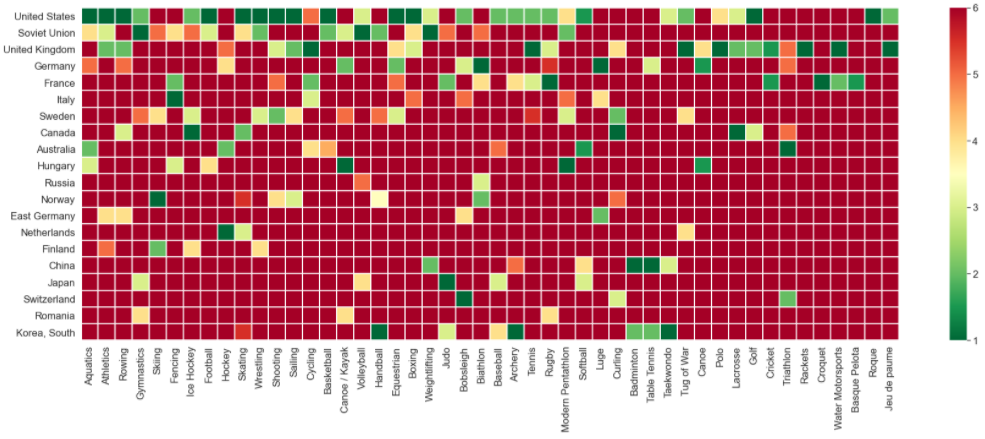

In [285]:
sport = pd.crosstab(olympics.Country, olympics.Sport)

In [287]:
sport.loc[top_50.index[0:20],]

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
United States,1184,55,994,0,68,318,0,0,93,111,...,60,0,8,54,1,15,114,0,43,129
United Kingdom,142,13,295,4,0,0,0,0,20,53,...,0,0,3,61,2,43,0,4,7,17
Germany,176,6,107,0,0,0,0,80,66,22,...,0,10,2,13,2,0,4,0,20,24
France,110,46,106,0,0,38,2,44,4,19,...,0,3,6,30,0,6,0,1,15,17
Italy,127,15,72,0,0,23,0,10,33,47,...,0,0,3,1,0,0,59,0,14,20
Sweden,101,2,103,0,0,0,0,16,0,11,...,0,3,0,14,1,8,0,0,4,84
Canada,119,0,84,0,0,9,0,3,22,17,...,0,0,2,2,2,0,2,0,3,16
Australia,400,2,84,0,24,60,0,0,0,4,...,60,0,2,9,5,0,4,0,4,3
Hungary,250,0,45,0,0,0,0,0,0,20,...,0,0,0,1,0,0,0,0,20,54


In [288]:
sport = sport.rank(ascending = False, method = 'average').loc[top_50.index[0:20],]

In [289]:
sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
United States,1.0,2.0,1.0,70.5,2.0,1.0,66.5,75.0,2.0,1.0,...,1.5,71.0,3.0,2.0,9.5,2.0,2.0,66.5,2.0,1.0
United Kingdom,8.5,7.0,2.0,6.0,68.5,74.0,66.5,75.0,6.0,3.0,...,67.5,71.0,14.0,1.0,5.0,1.0,75.5,1.0,23.0,15.5
Germany,4.0,12.0,5.0,70.5,68.5,74.0,66.5,1.0,3.0,8.0,...,67.5,3.0,19.5,6.0,5.0,68.5,15.5,66.5,6.5,12.0
France,12.0,4.0,6.0,70.5,68.5,4.0,1.5,4.0,11.0,11.5,...,67.5,6.5,6.0,3.0,71.5,6.0,75.5,2.0,9.5,15.5
Italy,10.0,6.0,12.0,70.5,68.5,12.0,66.5,8.0,4.0,4.0,...,67.5,71.0,14.0,25.5,71.5,68.5,7.0,66.5,11.0,13.0
Sweden,13.0,18.0,7.0,70.5,68.5,74.0,66.5,5.5,71.0,22.0,...,67.5,6.5,81.5,5.0,9.5,4.0,75.5,66.5,29.5,2.0
Canada,11.0,75.5,10.5,70.5,68.5,17.0,66.5,14.0,5.0,14.5,...,67.5,71.0,19.5,21.0,5.0,68.5,18.5,66.5,35.0,17.0
Australia,2.0,18.0,10.5,70.5,5.0,2.5,66.5,75.0,71.0,40.5,...,1.5,71.0,19.5,7.0,1.0,68.5,15.5,66.5,29.5,36.0
Hungary,3.0,75.5,15.5,70.5,68.5,74.0,66.5,75.0,71.0,9.5,...,67.5,71.0,81.5,25.5,71.5,68.5,75.5,66.5,6.5,7.0


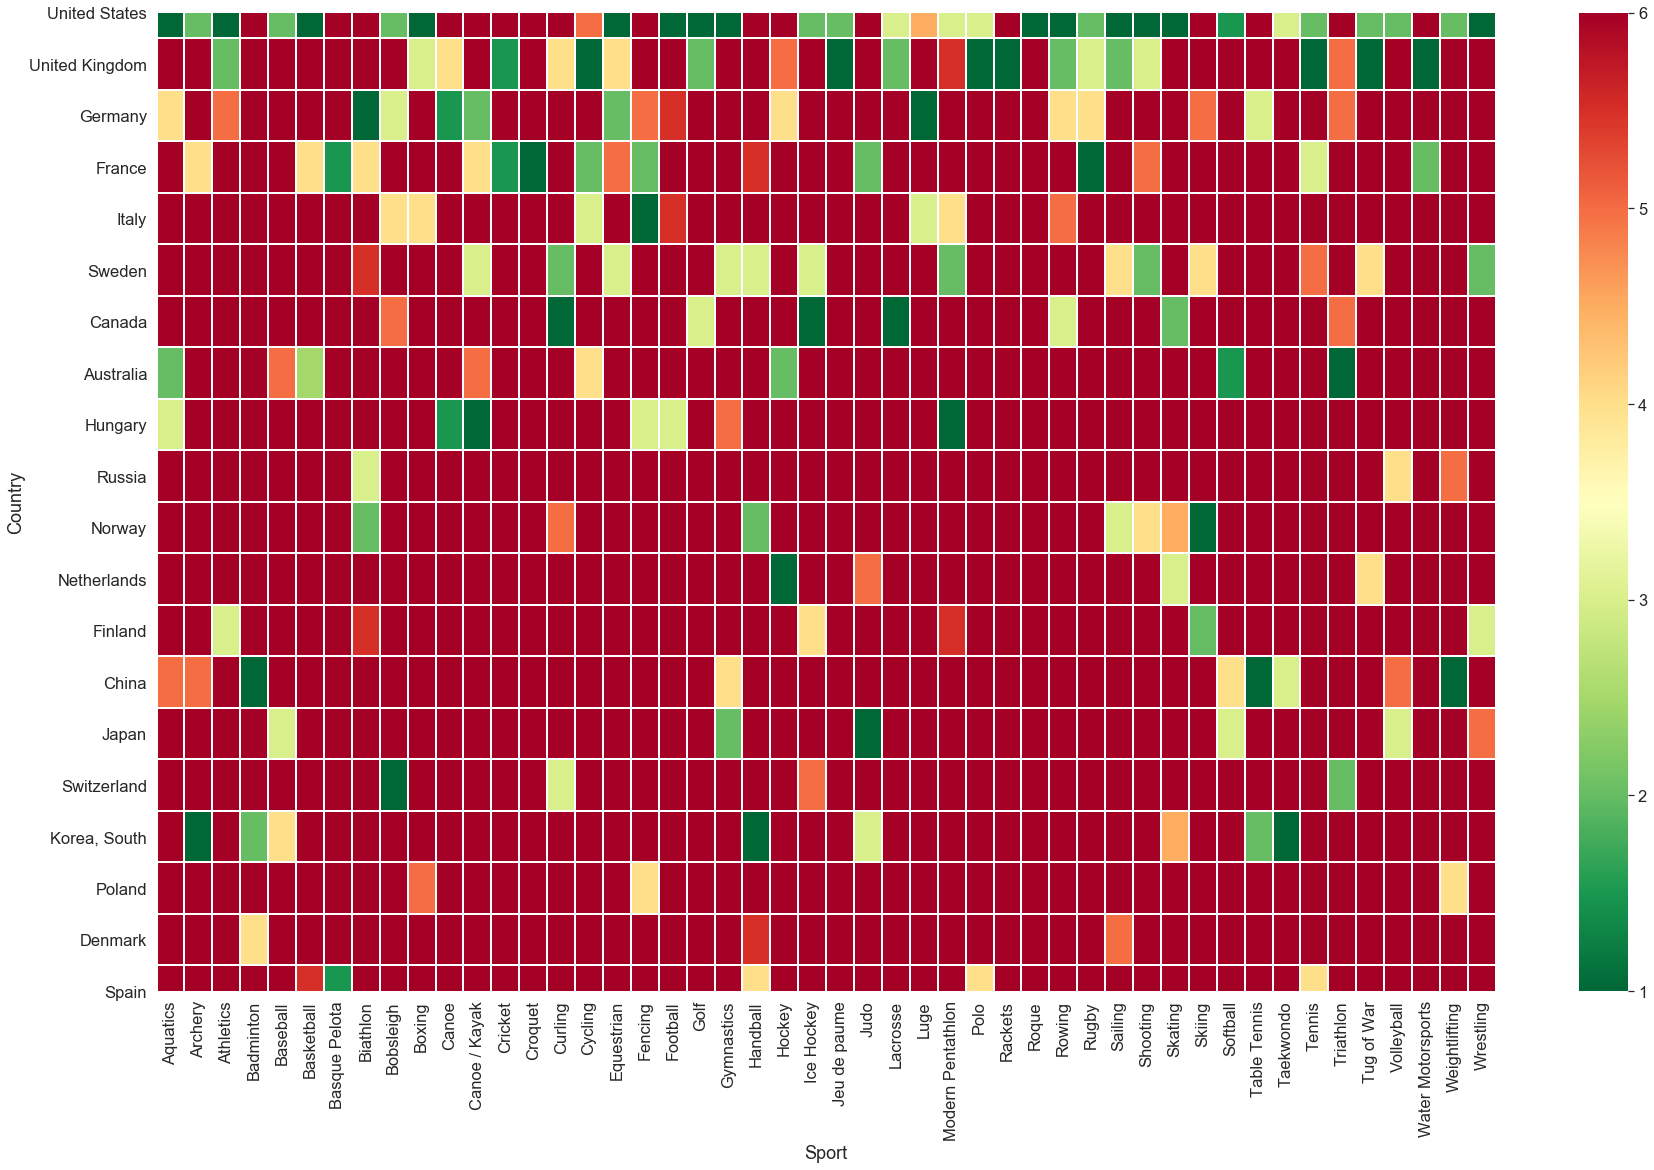

In [292]:
plt.figure(figsize = (30,18))
sns.heatmap(sport, cmap='RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)

# Missing full Country Names (see Data Cleaning Part 1)

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}